<a href="https://colab.research.google.com/github/aleja-k/PandasSecop/blob/master/SECOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Analisis Secop**

*Karen Perdomo

# **Cargue de dataframe**

In [316]:
# Importar Librerias a usar dentro del proceso de analisis y graficacion.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import re

***Nota: El repositorio en Github debe ser público para que pueda interactuar con pandas de lo contrario no es posible obtener la información.***

In [317]:
url="https://raw.githubusercontent.com/aleja-k/PandasSecop/master/SECOP_exported_1%20-%20copia.csv" # URL
#df=pd.read_csv(url,index_col="Unnamed: 0")
df= pd.read_csv(url, encoding= "utf-8",sep=';') # Encoding segun el tipo del csv y separador ;
df.head(10)

,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,...,CLAVES_BUSQUEDA,CODIGOS_UNSPSC,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,licita
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,...,0,0,-,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,"31/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",200000000,85161500 - Reparación de equipo médico o quirú...,NaN
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,...,0,0,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,80101500 - Servicios de consultoría de negocio...,NaN
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,...,0,0,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"11/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",46800000,80101500 - Servicios de consultoría de negocio...,NaN
3,2083,Prestar servicios profesionales en el habilita...,DIRECTA 120-2024,Proceso adjudicado y celebrado,Contratación régimen especial,Grupo de Gestion Juridica y Contractual,51380467,UNIDAD DE PLANEACION MINERO ENERGETICO,Presentación de oferta,6 días de tiempo transcurrido (8/02/2024 4:18:...,...,0,0,-,Prestación de servicios,Regla aplicable,Prestar servicios profesionales en el habilita...,"30/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",60208434,80111620 - Servicios temporales de recursos hu...,NaN
4,2084,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 85 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,7 días de tiempo transcurrido (7/02/2024 3:25:...,...,0,0,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,80101500 - Servicios de consultoría de negocio...,NaN
5,2085,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 84 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,7 días de tiempo transcurrido (7/02/2024 2:47:...,...,0,0,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"6/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Lim...",46800000,80101500 - Servicios de consultoría de negocio...,NaN
6,2086,JEHISON DAVID CIFUENTES CORTES,104772,Proceso adjudicado y celebrado,Contratación directa.,DIRECCION DE CONTRATACION,24600000,SECRETARIA DISTRITAL DE GOBIERNO 1,Presentación de oferta,9 días de tiempo transcurrido (5/02/2024 3:45:...,...,0,0,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,PRESTAR LOS SERVICIOS PROFESIONALES EN LA SECR...,"5/06/2024 11:00:00 PM ((UTC-05:00) Bogotá, Lim...",24600000,80111600 - Servicios de personal temporal,NaN
7,2087,DIMPE_MERCADO_2024_GEIH_BT_TH_Prestación de se...,EDP-325-2024,Proceso adjudicado y celebrado,Contratación directa.,SECRETARIA GENERAL - DANE CENTRAL,71500000,DEPARTAMENTO 

## **Analisis de primera instancia del Dataframe**

In [318]:
df.columns # Nombre de las columnas del Dataframe

Index(['Id', 'DESCRIPCION', 'NUMERO_PROCESO', 'ESTADO', 'TIPO_PROCESO',
       'UNIDAD_CONTRATACION', 'VALOR_ESTIMADO', 'ENTIDAD_ESTATAL',
       'FASE_ACTUAL', 'FECHA_PUBLICACION', 'FECHA_OFERTAS', 'CODIGO_NOTICE',
       'CLAVES_BUSQUEDA', 'CODIGOS_UNSPSC', 'FECHA_PRESENTACION',
       'TIPO_CONTRATO', 'JUSTIFICACION_CONTRATO', 'DESCRIPCION_CONTRATO',
       'FECHA_TERMINACION', 'VALOR_ESTIMADO_ADQUISICIONES', 'CODIGO_UNSPSC',
       'licita '],
      dtype='object')

In [319]:
df.info() # Informacion de registros y tipo de variable de cada una de las columnas del DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            44 non-null     int64  
 1   DESCRIPCION                   44 non-null     object 
 2   NUMERO_PROCESO                44 non-null     object 
 3   ESTADO                        44 non-null     object 
 4   TIPO_PROCESO                  44 non-null     object 
 5   UNIDAD_CONTRATACION           44 non-null     object 
 6   VALOR_ESTIMADO                44 non-null     object 
 7   ENTIDAD_ESTATAL               44 non-null     object 
 8   FASE_ACTUAL                   44 non-null     object 
 9   FECHA_PUBLICACION             44 non-null     object 
 10  FECHA_OFERTAS                 0 non-null      float64
 11  CODIGO_NOTICE                 44 non-null     object 
 12  CLAVES_BUSQUEDA               44 non-null     int64  
 13  CODIGOS

**Cercion de  la edad y las fechas a los tipos int y date**

In [320]:
df["CODIGO_UNSPSC"]= pd.to_numeric(df['CODIGO_UNSPSC'],errors="coerce")
df.head(3)

,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,...,CLAVES_BUSQUEDA,CODIGOS_UNSPSC,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,licita
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,...,0,0,-,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,"31/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",200000000,NaN,NaN
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,...,0,0,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,NaN,NaN
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,...,0,0,-,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"11/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",46800000,NaN,NaN


***Nota: En el caso de que existan diferentes tipos de datos al numérico se utliza el errors="coerce" y los deja como NaN***


In [321]:
#df1=df Transofrmacion a formato fecha de la fecha incidente
df['FECHA_PRESENTACION']=pd.to_datetime(df['FECHA_PRESENTACION'], errors="coerce")
df.head(3)

<ipython-input-321-37c78a5d8500>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA_PRESENTACION']=pd.to_datetime(df['FECHA_PRESENTACION'], errors="coerce")


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,...,CLAVES_BUSQUEDA,CODIGOS_UNSPSC,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,licita
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,...,0,0,NaT,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,"31/12/2024 12:00:00 PM ((UTC-05:00) Bogotá, Li...",200000000,NaN,NaN
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,...,0,0,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"20/12/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",85800000,NaN,NaN
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,...,0,0,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,"11/08/2024 11:59:00 PM ((UTC-05:00) Bogotá, Li...",46800000,NaN,NaN


In [322]:
df['FECHA_TERMINACION']=pd.to_datetime(df['FECHA_TERMINACION'], errors="coerce")
df.head(3)

<ipython-input-322-f5ac581b5303>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FECHA_TERMINACION']=pd.to_datetime(df['FECHA_TERMINACION'], errors="coerce")


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,...,CLAVES_BUSQUEDA,CODIGOS_UNSPSC,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,licita
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,5 días de tiempo transcurrido (9/02/2024 6:10:...,...,0,0,NaT,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,NaT,200000000,NaN,NaN
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:46...,...,0,0,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,85800000,NaN,NaN
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,6 días de tiempo transcurrido (9/02/2024 10:31...,...,0,0,NaT,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,46800000,NaN,NaN


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            44 non-null     int64         
 1   DESCRIPCION                   44 non-null     object        
 2   NUMERO_PROCESO                44 non-null     object        
 3   ESTADO                        44 non-null     object        
 4   TIPO_PROCESO                  44 non-null     object        
 5   UNIDAD_CONTRATACION           44 non-null     object        
 6   VALOR_ESTIMADO                44 non-null     object        
 7   ENTIDAD_ESTATAL               44 non-null     object        
 8   FASE_ACTUAL                   44 non-null     object        
 9   FECHA_PUBLICACION             44 non-null     object        
 10  FECHA_OFERTAS                 0 non-null      float64       
 11  CODIGO_NOTICE                 44 n

## **Dimensiones del Dataframe y limpieza**

In [324]:
df.isnull().sum() # Hallar la cantidad de nulos por columna del DF

Id                               0
DESCRIPCION                      0
NUMERO_PROCESO                   0
ESTADO                           0
TIPO_PROCESO                     0
UNIDAD_CONTRATACION              0
VALOR_ESTIMADO                   0
ENTIDAD_ESTATAL                  0
FASE_ACTUAL                      0
FECHA_PUBLICACION                0
FECHA_OFERTAS                   44
CODIGO_NOTICE                    0
CLAVES_BUSQUEDA                  0
CODIGOS_UNSPSC                   0
FECHA_PRESENTACION              44
TIPO_CONTRATO                    1
JUSTIFICACION_CONTRATO           1
DESCRIPCION_CONTRATO             0
FECHA_TERMINACION               44
VALOR_ESTIMADO_ADQUISICIONES     0
CODIGO_UNSPSC                   44
licita                          44
dtype: int64

In [325]:
row=df.shape[0] # Tamaño de las filas
column=df.shape[1] # Tamaño de las columnas
size= row*column
print(size)

968


In [326]:
nulos=df.isnull().sum().sum() # Suma los valores nulos

In [327]:
NaN_Porcentage= (nulos/size)*100 #porcentaje de numeros nulos
NaN_Porcentage

22.933884297520663

***Nota: Por efectos de aleración en la base de datos no vamos a realizar la eliminacion de los NaN por la importancia de las variables a nivel de estudio.***

## **Generacion de nuevas columnas**

In [328]:
"""licita=df.loc[1,"FECHA_PUBLICACION"]
SECOP = df.loc[1,'FECHA_PRESENTACION']
res= round(abs((SECOP-licita).total_seconds() /60),2)
res"""


'licita=df.loc[1,"FECHA_PUBLICACION"]\nSECOP = df.loc[1,\'FECHA_PRESENTACION\']\nres= round(abs((SECOP-licita).total_seconds() /60),2)\nres'

In [329]:
 # Se extrae la fecha de publicación

df['FECHA_PUBLICACION'] = df['FECHA_PUBLICACION'].astype(str).apply(lambda x: re.search(r'\d+/\d+/\d+', x).group() if re.search(r'\d+/\d+/\d+', x) else None)
print(df['FECHA_PUBLICACION'])



0      9/02/2024
1      9/02/2024
2      9/02/2024
3      8/02/2024
4      7/02/2024
5      7/02/2024
6      5/02/2024
7      2/02/2024
8     31/01/2024
9     31/01/2024
10    31/01/2024
11    30/01/2024
12    26/01/2024
13    26/01/2024
14    26/01/2024
15    26/01/2024
16    25/01/2024
17    25/01/2024
18    25/01/2024
19    25/01/2024
20    24/01/2024
21    24/01/2024
22    23/01/2024
23    19/01/2024
24    19/01/2024
25    17/01/2024
26    17/01/2024
27    16/01/2024
28    15/01/2024
29    15/01/2024
30    15/01/2024
31    14/01/2024
32    12/01/2024
33    11/01/2024
34    11/01/2024
35    10/01/2024
36    10/01/2024
37     9/01/2024
38     9/01/2024
39     9/01/2024
40     4/01/2024
41    13/02/2024
42    15/02/2024
43    15/02/2024
Name: FECHA_PUBLICACION, dtype: object


In [330]:
df['FECHA_PRESENTACION'] = df['FECHA_PRESENTACION'].astype(str).apply(lambda x: re.search(r'\d+/\d+/\d+', x).group() if re.search(r'\d+/\d+/\d+', x) else None)
print(df['FECHA_PRESENTACION'])


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
Name: FECHA_PRESENTACION, dtype: object


In [331]:
# Se recorre todo el DF para asi comparar las fechas y extraer la diferencia de entre la publicación de la oferta y la fecha de presentación
for i in range(row):
    licita = df.loc[i, "FECHA_PUBLICACION"]
    SECOP = df.loc[i, 'FECHA_PRESENTACION']

    if licita is not None and SECOP is not None:
        licita = pd.to_datetime(licita)  # Convertir a datetime si no lo está
        SECOP = pd.to_datetime(SECOP)    # Convertir a datetime si no lo está
        res = round(abs((licita - SECOP).total_seconds() / 60), 2)
        df.loc[i, "MINUTOS_INICIO_OFERTA"] = res
    else:
        df.loc[i, "MINUTOS_INICIO_OFERTA"] = None

df


,Id,DESCRIPCION,NUMERO_PROCESO,ESTADO,TIPO_PROCESO,UNIDAD_CONTRATACION,VALOR_ESTIMADO,ENTIDAD_ESTATAL,FASE_ACTUAL,FECHA_PUBLICACION,...,CODIGOS_UNSPSC,FECHA_PRESENTACION,TIPO_CONTRATO,JUSTIFICACION_CONTRATO,DESCRIPCION_CONTRATO,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,licita,MINUTOS_INICIO_OFERTA
0,2080,HSAM-330-INGENIERIA VITAL S.A.S,330 DE 2024,Publicado,Contratación régimen especial,OFICINA DE GESTION JURIDICA Y CONTRATACION,297000000,E.S.E. HOSPITAL SAN ANTONIO,Presentación de oferta,9/02/2024,...,0,None,Decreto 092 de 2017,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,NaT,200000000,NaN,NaN,NaN
1,2081,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 86 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,9/02/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,85800000,NaN,NaN,NaN
2,2082,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 83 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,9/02/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,46800000,NaN,NaN,NaN
3,2083,Prestar servicios profesionales en el habilita...,DIRECTA 120-2024,Proceso adjudicado y celebrado,Contratación régimen especial,Grupo de Gestion Juridica y Contractual,51380467,UNIDAD DE PLANEACION MINERO ENERGETICO,Presentación de oferta,8/02/2024,...,0,None,Prestación de servicios,Regla aplicable,Prestar servicios profesionales en el habilita...,NaT,60208434,NaN,NaN,NaN
4,2084,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 85 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,85800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,7/02/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,85800000,NaN,NaN,NaN
5,2085,CONTRATO DE PRESTACIÓN DE SERVICIOS PROFESIONA...,CONTRATO 84 DE 2024,Proceso adjudicado y celebrado,Contratación directa.,SUBDIRECCION ADMINISTRATIVA,46800000,SUPERINTENDENCIA DE SOCIEDADES,Presentación de oferta,7/02/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales especializados...,NaT,46800000,NaN,NaN,NaN
6,2086,JEHISON DAVID CIFUENTES CORTES,104772,Proceso adjudicado y celebrado,Contratación directa.,DIRECCION DE CONTRATACION,24600000,SECRETARIA DISTRITAL DE GOBIERNO 1,Presentación de oferta,5/02/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,PRESTAR LOS SERVICIOS PROFESIONALES EN LA SECR...,NaT,24600000,NaN,NaN,NaN
7,2087,DIMPE_MERCADO_2024_GEIH_BT_TH_Prestación de se...,EDP-325-2024,Proceso adjudicado y celebrado,Contratación directa.,SECRETARIA GENERAL - DANE CENTRAL,71500000,DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADI...,Presentación de oferta,2/02/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,DIMPE_MERCADO_2024_GEIH_BT_TH_Prestación de se...,NaT,71500000,NaN,NaN,NaN
8,2088,Profesional TICS,ADRES-CD-172-2024,Proceso adjudicado y celebrado,Contratación directa.,DIRECCIÓN ADMINISTRATIVA Y FINANCIERA,66648137,ADMINISTRADORA DE LOS RECURSOS DEL SISTEMA GEN...,Presentación de oferta,31/01/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servicios profesionales a la Dirección...,NaT,66648137,NaN,NaN,NaN
9,2089,Prestar servicios profesionales a la UPRA para...,FOR-107-2024,Proceso adjudicado y celebrado,Contratación directa.,SECRETARIA GENERAL,76560000,UPRA,Presentación de oferta,31/01/2024,...,0,None,Prestación de servicios,Servicios profesionales y apoyo a la gestión,Prestar servi

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Id                            44 non-null     int64         
 1   DESCRIPCION                   44 non-null     object        
 2   NUMERO_PROCESO                44 non-null     object        
 3   ESTADO                        44 non-null     object        
 4   TIPO_PROCESO                  44 non-null     object        
 5   UNIDAD_CONTRATACION           44 non-null     object        
 6   VALOR_ESTIMADO                44 non-null     object        
 7   ENTIDAD_ESTATAL               44 non-null     object        
 8   FASE_ACTUAL                   44 non-null     object        
 9   FECHA_PUBLICACION             44 non-null     object        
 10  FECHA_OFERTAS                 0 non-null      float64       
 11  CODIGO_NOTICE                 44 n

In [333]:
df.describe()

,Id,FECHA_OFERTAS,CLAVES_BUSQUEDA,CODIGOS_UNSPSC,FECHA_TERMINACION,VALOR_ESTIMADO_ADQUISICIONES,CODIGO_UNSPSC,licita,MINUTOS_INICIO_OFERTA
count,44.000000,0.0,44.0,44.0,0,4.400000e+01,0.0,0.0,0.0
mean,2107.500000,NaN,0.0,0.0,NaT,6.403720e+08,NaN,NaN,NaN
min,2080.000000,NaN,0.0,0.0,NaT,0.000000e+00,NaN,NaN,NaN
25%,2090.750000,NaN,0.0,0.0,NaT,0.000000e+00,NaN,NaN,NaN
50%,2101.500000,NaN,0.0,0.0,NaT,5.450655e+07,NaN,NaN,NaN
75%,2112.250000,NaN,0.0,0.0,NaT,9.002950e+07,NaN,NaN,NaN
max,2213.000000,NaN,0.0,0.0,NaT,2.187859e+10,NaN,NaN,NaN
std,29.148776,NaN,0.0,0.0,NaN,3.313735e+09,NaN,NaN,NaN


## **Agrupamiento mulltiple y filtros**

In [334]:
df.columns

Index(['Id', 'DESCRIPCION', 'NUMERO_PROCESO', 'ESTADO', 'TIPO_PROCESO',
       'UNIDAD_CONTRATACION', 'VALOR_ESTIMADO', 'ENTIDAD_ESTATAL',
       'FASE_ACTUAL', 'FECHA_PUBLICACION', 'FECHA_OFERTAS', 'CODIGO_NOTICE',
       'CLAVES_BUSQUEDA', 'CODIGOS_UNSPSC', 'FECHA_PRESENTACION',
       'TIPO_CONTRATO', 'JUSTIFICACION_CONTRATO', 'DESCRIPCION_CONTRATO',
       'FECHA_TERMINACION', 'VALOR_ESTIMADO_ADQUISICIONES', 'CODIGO_UNSPSC',
       'licita ', 'MINUTOS_INICIO_OFERTA'],
      dtype='object')

In [335]:
#df.groupby(['TIPO_PROCESO'])[['MINUTOS_INICIO_OFERTA']].value_counts()
df['TIPO_PROCESO']=df['TIPO_PROCESO'].str.upper()
df['TIPO_PROCESO'].value_counts()

TIPO_PROCESO
CONTRATACIÓN DIRECTA.                         28
CONTRATACIÓN RÉGIMEN ESPECIAL                 13
LICITACIÓN PÚBLICA (OBRA PÚBLICA)              2
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES     1
Name: count, dtype: int64

In [336]:
df['ESTADO']=df['ESTADO'].str.upper()# Dejar los datos en mayusculas
df['ESTADO'].value_counts() # Ver la clasificacion por cada diferencia de informacion en la columna y contarlos

ESTADO
PROCESO ADJUDICADO Y CELEBRADO           29
PUBLICADO                                13
PROCESO EN EVALUACIÓN Y OBSERVACIONES     2
Name: count, dtype: int64

In [337]:
df['UNIDAD_CONTRATACION']=df['UNIDAD_CONTRATACION'].str.upper()
df['UNIDAD_CONTRATACION'].value_counts()

UNIDAD_CONTRATACION
SECRETARIA GENERAL - DANE CENTRAL             8
SECRETARIA GENERAL                            5
SUBDIRECCION ADMINISTRATIVA                   4
GESTIÓN DE LA CONTRATACIÓN                    3
BPP                                           3
GESTIÓN CONTRACTUAL 2024                      2
MEDELLIN NIVEL CENTRAL                        2
CONTRATOS                                     2
COMISION DE REGULACION DE ENERGIA Y GAS       1
ICDT CAQUETA                                  1
OPERACION DE ABASTECIMIENTO REGIONAL          1
CONTRATACION                                  1
NUEVA LICORERA DE BOYACA                      1
OFICINA DE TALENTO HUMANO                     1
GRUPO DE CONTRATOS UGPP                       1
OFICINA DE GESTION JURIDICA Y CONTRATACION    1
GESTIÓN CONTRACTUAL                           1
2020+GIT GESTION CONTRACTUAL                  1
UC FONVALMED                                  1
DIRECCIÓN ADMINISTRATIVA Y FINANCIERA         1
DIRECCION DE CONTRAT

In [338]:
df['DESCRIPCION_CONTRATO']=df['DESCRIPCION_CONTRATO'].str.upper()
df['DESCRIPCION_CONTRATO']=df['DESCRIPCION_CONTRATO'].str.replace('^ ','',regex=False)# Eliminar espacios al inicio de cada uno de los datos
df['DESCRIPCION_CONTRATO'].value_counts()

DESCRIPCION_CONTRATO
PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS PARA EL FORTALECIMIENTO DEL MODELO DE OPERACIÓN INTERNO DE LA DIRECCIÓN DE TECNOLOGÍA DE LA INFORMACIÓN Y LAS COMUNICACIONES EN EL CICLO DE MEJORA CONTINUA Y MANTENIMIENTO EVOLUTIVO SOBRE LOS PROCESOS AUTOMATIZADOS EN LA HERRAMIENTA BPM AURA PORTAL.                                                                                                                                                                                                                 4
SUMINISTRO DE ACTIVIDADES DE MANTENIMIENTO PREVENTIVO, CORRECTIVO, ADECUACIONES Y MEJORAMIENTO DE INSTALACIONES FÍSICAS Y MOBILIARIO, DE LAS UNIDADES DE INFORMACIÓN DEL SBPM, LA BIBLIOTECA PÚBLICA PILOTO Y SUS FILIALES                                                                                                                                                                                                                                                              

In [339]:
df['TIPO_PROCESO'] = df['TIPO_PROCESO'].str.upper()
df['TIPO_PROCESO'] = df['TIPO_PROCESO'].str.replace('^ ', '', regex=False)  # Eliminar espacios al inicio de cada uno de los datos
df['TIPO_PROCESO'].value_counts()


TIPO_PROCESO
CONTRATACIÓN DIRECTA.                         28
CONTRATACIÓN RÉGIMEN ESPECIAL                 13
LICITACIÓN PÚBLICA (OBRA PÚBLICA)              2
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES     1
Name: count, dtype: int64

In [340]:

df['TIPO_CONTRATO'].value_counts()

TIPO_CONTRATO
Prestación de servicios    34
Decreto 092 de 2017         6
Obra                        2
Otro                        1
Name: count, dtype: int64

In [341]:
df['CLAVES_BUSQUEDA'].value_counts()

CLAVES_BUSQUEDA
0    44
Name: count, dtype: int64

In [342]:
df['CLAVES_BUSQUEDA'] = df['CLAVES_BUSQUEDA'].astype(str).str.replace("0", "SIN_DATO")
 #Remplazo de valores

In [343]:
df['CLAVES_BUSQUEDA'].value_counts()

CLAVES_BUSQUEDA
SIN_DATO    44
Name: count, dtype: int64

In [344]:
df['CODIGOS_UNSPSC'].value_counts()

CODIGOS_UNSPSC
0    44
Name: count, dtype: int64

In [345]:
df['CODIGOS_UNSPSC'] = df['CODIGOS_UNSPSC'].astype(str).str.replace("0", "SIN_DATO")
 #Remplazo de valores

In [346]:
df['CODIGOS_UNSPSC'].value_counts()

CODIGOS_UNSPSC
SIN_DATO    44
Name: count, dtype: int64

In [347]:
df['FECHA_OFERTAS'].value_counts()

Series([], Name: count, dtype: int64)

In [348]:
df['FECHA_OFERTAS'] = df['FECHA_OFERTAS'].replace('0', 'SIN_DATO', limit=0)


 #Remplazo de valores

In [349]:
df['FECHA_OFERTAS'].value_counts()

Series([], Name: count, dtype: int64)

In [350]:
df['VALOR_ESTIMADO'].str.replace(',', '.')


0       297000000
1        85800000
2        46800000
3        51380467
4        85800000
5        46800000
6        24600000
7        71500000
8        66648137
9        76560000
10       48488000
11       46200000
12       47740000
13      135141014
14      344934371
15       48463093
16       48463093
17              0
18      121000000
19       48463093
20      633301822
21      568483595
22        6869169
23    57666666.67
24      126500000
25       14186667
26       62700000
27      102600000
28       57500000
29       22352220
30       86152000
31      102718000
32      114840000
33       63825000
34       29475600
35       52081200
36       56931900
37       11915345
38       47150000
39      452757144
40       62880000
41      633301822
42        8829742
43       30581600
Name: VALOR_ESTIMADO, dtype: object

Generación de filtros con respecto al si licita o no la entidad en SECOP esta se utiliza para generar las gráficas que se encuentran dentro del estudio de este dataframe en la seccion de graficacion


In [351]:
#Casos_licita = df.loc['FECHA_OFERTAS']

In [352]:
#Casos_licita=Casos_licita.reset_index(drop = True) # Reordenamos el DF
#Casos_licita.head()

## **Creacion de un nuevo dataframe**

In [353]:
SECOP = df[['NUMERO_PROCESO','TIPO_PROCESO','VALOR_ESTIMADO','FECHA_PUBLICACION','FECHA_PRESENTACION','DESCRIPCION_CONTRATO']] # Creo nuevo df basado en las anteriores columnas
#SECOP = SECOP[SECOP['TIPO_PROCESO'].str.contains('CONTRATACIÓN RÉGIMEN ESPECIAL|LICITACIÓN PÚBLICA \(OBRA PÚBLICA\)', case=False, na=False)]
SECOP=SECOP.reset_index(drop = True)
SECOP.to_excel('SECOP.xlsx', index=False)
SECOP



,NUMERO_PROCESO,TIPO_PROCESO,VALOR_ESTIMADO,FECHA_PUBLICACION,FECHA_PRESENTACION,DESCRIPCION_CONTRATO
0,330 DE 2024,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000,9/02/2024,None,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...
1,CONTRATO 86 DE 2024,CONTRATACIÓN DIRECTA.,85800000,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
2,CONTRATO 83 DE 2024,CONTRATACIÓN DIRECTA.,46800000,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
3,DIRECTA 120-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467,8/02/2024,None,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...
4,CONTRATO 85 DE 2024,CONTRATACIÓN DIRECTA.,85800000,7/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
5,CONTRATO 84 DE 2024,CONTRATACIÓN DIRECTA.,46800000,7/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
6,104772,CONTRATACIÓN DIRECTA.,24600000,5/02/2024,None,PRESTAR LOS SERVICIOS PROFESIONALES EN LA SECR...
7,EDP-325-2024,CONTRATACIÓN DIRECTA.,71500000,2/02/2024,None,DIMPE_MERCADO_2024_GEIH_BT_TH_PRESTACIÓN DE SE...
8,ADRES-CD-172-2024,CONTRATACIÓN DIRECTA.,66648137,31/01/2024,None,PRESTAR SERVICIOS PROFESIONALES A LA DIRECCIÓN...
9,FOR-107-2024,CONTRATACIÓN DIRECTA.,76560000,31/01/2024,None,PRESTAR SERVICIOS PROFESIONALES A LA UPRA PARA...


### **Filtro 2**

In [354]:
Respuesta_Licita=df.groupby(["TIPO_PROCESO"])[["MINUTOS_INICIO_OFERTA"]].mean() # Agrupa la columna que desea
Respuesta_Licita

,MINUTOS_INICIO_OFERTA
TIPO_PROCESO,
CONTRATACIÓN DIRECTA.,NaN
CONTRATACIÓN RÉGIMEN ESPECIAL,NaN
LICITACIÓN PÚBLICA (OBRA PÚBLICA),NaN
SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,NaN


In [355]:
Respuesta_Licita=Respuesta_Licita.rename_axis("TIPO_PROCESO").reset_index() # Modifica el dataframe generando la columna de director y generando un index
Respuesta_Licita

,TIPO_PROCESO,MINUTOS_INICIO_OFERTA
0,CONTRATACIÓN DIRECTA.,NaN
1,CONTRATACIÓN RÉGIMEN ESPECIAL,NaN
2,LICITACIÓN PÚBLICA (OBRA PÚBLICA),NaN
3,SOLICITUD DE INFORMACIÓN A LOS PROVEEDORES,NaN


In [356]:
union = pd.merge(SECOP, Respuesta_Licita) # Union de Dataframes A traves del Merge
union


,NUMERO_PROCESO,TIPO_PROCESO,VALOR_ESTIMADO,FECHA_PUBLICACION,FECHA_PRESENTACION,DESCRIPCION_CONTRATO,MINUTOS_INICIO_OFERTA
0,330 DE 2024,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000,9/02/2024,None,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,NaN
1,DIRECTA 120-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467,8/02/2024,None,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...,NaN
2,268496,CONTRATACIÓN RÉGIMEN ESPECIAL,47740000,26/01/2024,None,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA ACT...,NaN
3,5384-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,48463093,26/01/2024,None,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA EL ...,NaN
4,5383-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,48463093,25/01/2024,None,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA EL\...,NaN
5,5440-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,48463093,25/01/2024,None,PRESTACIÓN DE SERVICIOS PROFESIONALES PARA EL ...,NaN
6,2024-019,CONTRATACIÓN RÉGIMEN ESPECIAL,568483595,24/01/2024,None,LA RENOVACIÓN DEL SAAS DEL SOFTWARE AZDIGITAL ...,NaN
7,0641-CDPS-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,14186667,17/01/2024,None,CONTRATAR LA PRESTACIÓN DE SERVICIOS PROFESION...,NaN
8,PDO-004-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,86152000,15/01/2024,None,PRESTACION DE SERVICIOS PROFESIONALES Y DE APO...,NaN
9,268462,CONTRATACIÓN RÉGIMEN ESPECIAL,29475600,11/01/2024,None,PRESTACIÓN DE SERVICIOS PERSONALES PARA APOYAR...,NaN


*Análisis de otro tipo de variables con respecto a la licitación*

In [357]:

licita1 = df[['TIPO_PROCESO','VALOR_ESTIMADO','TIPO_CONTRATO','DESCRIPCION_CONTRATO']] # Creo nuevo df basado en las anteriores columnas
#licita1 = SECOP[SECOP['TIPO_PROCESO'].str.contains('CONTRATACIÓN RÉGIMEN ESPECIAL|LICITACIÓN PÚBLICA \(OBRA PÚBLICA\)', case=False, na=False)]
licita1=licita1.reset_index(drop = True)
licita1

,TIPO_PROCESO,VALOR_ESTIMADO,TIPO_CONTRATO,DESCRIPCION_CONTRATO
0,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000,Decreto 092 de 2017,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...
1,CONTRATACIÓN DIRECTA.,85800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
2,CONTRATACIÓN DIRECTA.,46800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
3,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...
4,CONTRATACIÓN DIRECTA.,85800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
5,CONTRATACIÓN DIRECTA.,46800000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...
6,CONTRATACIÓN DIRECTA.,24600000,Prestación de servicios,PRESTAR LOS SERVICIOS PROFESIONALES EN LA SECR...
7,CONTRATACIÓN DIRECTA.,71500000,Prestación de servicios,DIMPE_MERCADO_2024_GEIH_BT_TH_PRESTACIÓN DE SE...
8,CONTRATACIÓN DIRECTA.,66648137,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES A LA DIRECCIÓN...
9,CONTRATACIÓN DIRECTA.,76560000,Prestación de servicios,PRESTAR SERVICIOS PROFESIONALES A LA UPRA PARA...


In [358]:
codigo=df.groupby(["JUSTIFICACION_CONTRATO"])[["VALOR_ESTIMADO_ADQUISICIONES"]].mean() # Agrupa la columna que desea
codigo

,VALOR_ESTIMADO_ADQUISICIONES
JUSTIFICACION_CONTRATO,
"Artículo 30, Ley 80 de 1993",0.000000e+00
Decreto 092 de 2017,3.774513e+09
No existe pluralidad de oferentes en el mercado,2.655464e+08
Regla aplicable,1.310120e+07
Servicios profesionales y apoyo a la gestión,1.887111e+08


In [359]:
# Creamos el indice
codigo=codigo.rename_axis("JUSTIFICACION_CONTRATO").reset_index() # Modifica el dataframe generando la columna de director y generando un index
codigo

,JUSTIFICACION_CONTRATO,VALOR_ESTIMADO_ADQUISICIONES
0,"Artículo 30, Ley 80 de 1993",0.000000e+00
1,Decreto 092 de 2017,3.774513e+09
2,No existe pluralidad de oferentes en el mercado,2.655464e+08
3,Regla aplicable,1.310120e+07
4,Servicios profesionales y apoyo a la gestión,1.887111e+08


**USO DE KMeans GaussianMixture DBSCAN**

In [360]:
!pip install pandas scikit-learn scikit-learn-extra


In [361]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [362]:
SECOP['licita'] = None

SECOP

,NUMERO_PROCESO,TIPO_PROCESO,VALOR_ESTIMADO,FECHA_PUBLICACION,FECHA_PRESENTACION,DESCRIPCION_CONTRATO,licita
0,330 DE 2024,CONTRATACIÓN RÉGIMEN ESPECIAL,297000000,9/02/2024,None,PRESTACIÓN DE SERVICIOS INTEGRALES: DE MANTENI...,None
1,CONTRATO 86 DE 2024,CONTRATACIÓN DIRECTA.,85800000,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,None
2,CONTRATO 83 DE 2024,CONTRATACIÓN DIRECTA.,46800000,9/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,None
3,DIRECTA 120-2024,CONTRATACIÓN RÉGIMEN ESPECIAL,51380467,8/02/2024,None,PRESTAR SERVICIOS PROFESIONALES EN EL HABILITA...,None
4,CONTRATO 85 DE 2024,CONTRATACIÓN DIRECTA.,85800000,7/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,None
5,CONTRATO 84 DE 2024,CONTRATACIÓN DIRECTA.,46800000,7/02/2024,None,PRESTAR SERVICIOS PROFESIONALES ESPECIALIZADOS...,None
6,104772,CONTRATACIÓN DIRECTA.,24600000,5/02/2024,None,PRESTAR LOS SERVICIOS PROFESIONALES EN LA SECR...,None
7,EDP-325-2024,CONTRATACIÓN DIRECTA.,71500000,2/02/2024,None,DIMPE_MERCADO_2024_GEIH_BT_TH_PRESTACIÓN DE SE...,None
8,ADRES-CD-172-2024,CONTRATACIÓN DIRECTA.,66648137,31/01/2024,None,PRESTAR SERVICIOS PROFESIONALES A LA DIRECCIÓN...,None
9,FOR-107-2024,CONTRATACIÓN DIRECTA.,76560000,31/01/2024,None,PRESTAR SERVICIOS PROFESIONALES A LA UPRA PARA...,None


In [363]:
print(df.index)


RangeIndex(start=0, stop=44, step=1)


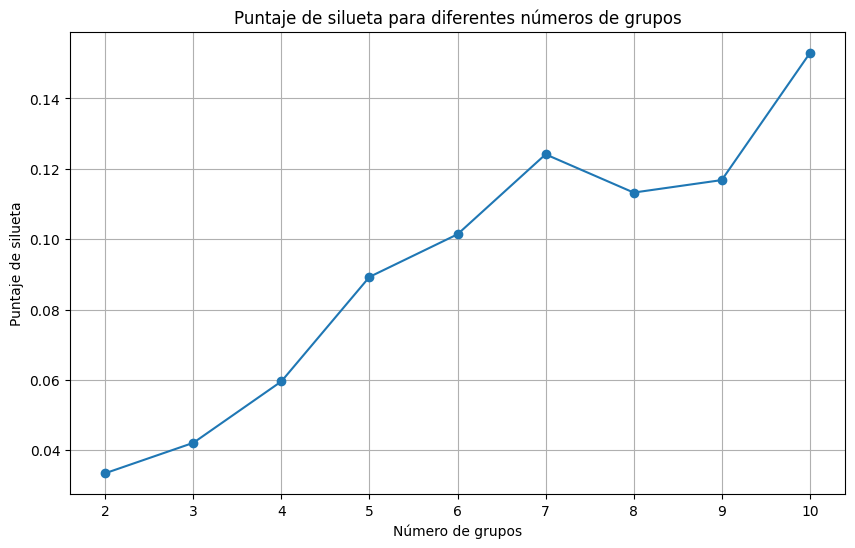

In [364]:
# Combinar los campos de texto en un solo campo
SECOP_clean = SECOP.copy()

SECOP_clean ['texto_combinado'] = SECOP['NUMERO_PROCESO'].astype(str) + ' ' +SECOP['VALOR_ESTIMADO'].astype(str) + ' '  + SECOP['TIPO_PROCESO'] + ' ' + SECOP['DESCRIPCION_CONTRATO']+ ' ' + SECOP['FECHA_PUBLICACION']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto
vectorizador = TfidfVectorizer(stop_words='english')
X = vectorizador.fit_transform(textos)

# Lista para almacenar los puntajes de silueta
silhouette_scores = []

# Calcula el puntaje de silueta para diferentes números de grupos
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de grupos')
plt.ylabel('Puntaje de silueta')
plt.title('Puntaje de silueta para diferentes números de grupos')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()

In [365]:
SECOP = pd.DataFrame(SECOP)
# Eliminar las filas con valores no numéricos en la columna 'VALOR_ESTIMADO'
SECOP_clean = SECOP.dropna(subset=['VALOR_ESTIMADO'])
# Reemplazar las comas por puntos en la columna 'VALOR_ESTIMADO'
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].str.replace(',', '.')

# Convertir la columna 'VALOR_ESTIMADO' a valores numéricos
SECOP_clean['VALOR_ESTIMADO'] = SECOP_clean['VALOR_ESTIMADO'].astype(float)
# Eliminar las columnas 'NUMERO_PROCESO' y 'DESCRIPCION_CONTRATO'
SECOP_clean = SECOP_clean.drop(['NUMERO_PROCESO', 'DESCRIPCION_CONTRATO'], axis=1)
# Convertir las columnas restantes a numérico y escalar los datos
from sklearn.preprocessing import StandardScaler

X = SECOP_clean[['VALOR_ESTIMADO']]
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Mostrar los resultados
print(X_scaled)




[[ 1.1348874 ]
 [-0.19660971]
 [-0.44248276]
 [-0.41360549]
 [-0.19660971]
 [-0.44248276]
 [-0.58244126]
 [-0.28676316]
 [-0.31735143]
 [-0.25486271]
 [-0.43184087]
 [-0.44626542]
 [-0.43655659]
 [ 0.11445761]
 [ 1.43708662]
 [-0.43199789]
 [-0.43199789]
 [-0.73753041]
 [ 0.02530647]
 [-0.43199789]
 [ 3.25508107]
 [ 2.84643864]
 [-0.69422417]
 [-0.37397454]
 [ 0.05998088]
 [-0.64809146]
 [-0.34224221]
 [-0.09069517]
 [-0.37502528]
 [-0.59661225]
 [-0.19439055]
 [-0.08995124]
 [-0.01352886]
 [-0.33514971]
 [-0.55170335]
 [-0.40918776]
 [-0.37860683]
 [-0.66241087]
 [-0.4402762 ]
 [ 2.11684851]
 [-0.34110741]
 [ 3.25508107]
 [-0.68186386]
 [-0.54473064]]


In [366]:
# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
print(X_scaled)

[[ 1.1348874 ]
 [-0.19660971]
 [-0.44248276]
 [-0.41360549]
 [-0.19660971]
 [-0.44248276]
 [-0.58244126]
 [-0.28676316]
 [-0.31735143]
 [-0.25486271]
 [-0.43184087]
 [-0.44626542]
 [-0.43655659]
 [ 0.11445761]
 [ 1.43708662]
 [-0.43199789]
 [-0.43199789]
 [-0.73753041]
 [ 0.02530647]
 [-0.43199789]
 [ 3.25508107]
 [ 2.84643864]
 [-0.69422417]
 [-0.37397454]
 [ 0.05998088]
 [-0.64809146]
 [-0.34224221]
 [-0.09069517]
 [-0.37502528]
 [-0.59661225]
 [-0.19439055]
 [-0.08995124]
 [-0.01352886]
 [-0.33514971]
 [-0.55170335]
 [-0.40918776]
 [-0.37860683]
 [-0.66241087]
 [-0.4402762 ]
 [ 2.11684851]
 [-0.34110741]
 [ 3.25508107]
 [-0.68186386]
 [-0.54473064]]


In [367]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(X_scaled)

[[ 1.1348874 ]
 [-0.19660971]
 [-0.44248276]
 [-0.41360549]
 [-0.19660971]
 [-0.44248276]
 [-0.58244126]
 [-0.28676316]
 [-0.31735143]
 [-0.25486271]
 [-0.43184087]
 [-0.44626542]
 [-0.43655659]
 [ 0.11445761]
 [ 1.43708662]
 [-0.43199789]
 [-0.43199789]
 [-0.73753041]
 [ 0.02530647]
 [-0.43199789]
 [ 3.25508107]
 [ 2.84643864]
 [-0.69422417]
 [-0.37397454]
 [ 0.05998088]
 [-0.64809146]
 [-0.34224221]
 [-0.09069517]
 [-0.37502528]
 [-0.59661225]
 [-0.19439055]
 [-0.08995124]
 [-0.01352886]
 [-0.33514971]
 [-0.55170335]
 [-0.40918776]
 [-0.37860683]
 [-0.66241087]
 [-0.4402762 ]
 [ 2.11684851]
 [-0.34110741]
 [ 3.25508107]
 [-0.68186386]
 [-0.54473064]]


In [368]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)
print(X_scaled)

[[ 1.1348874 ]
 [-0.19660971]
 [-0.44248276]
 [-0.41360549]
 [-0.19660971]
 [-0.44248276]
 [-0.58244126]
 [-0.28676316]
 [-0.31735143]
 [-0.25486271]
 [-0.43184087]
 [-0.44626542]
 [-0.43655659]
 [ 0.11445761]
 [ 1.43708662]
 [-0.43199789]
 [-0.43199789]
 [-0.73753041]
 [ 0.02530647]
 [-0.43199789]
 [ 3.25508107]
 [ 2.84643864]
 [-0.69422417]
 [-0.37397454]
 [ 0.05998088]
 [-0.64809146]
 [-0.34224221]
 [-0.09069517]
 [-0.37502528]
 [-0.59661225]
 [-0.19439055]
 [-0.08995124]
 [-0.01352886]
 [-0.33514971]
 [-0.55170335]
 [-0.40918776]
 [-0.37860683]
 [-0.66241087]
 [-0.4402762 ]
 [ 2.11684851]
 [-0.34110741]
 [ 3.25508107]
 [-0.68186386]
 [-0.54473064]]


In [369]:
# Aplicar Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X_scaled)
print(X_scaled)

[[ 1.1348874 ]
 [-0.19660971]
 [-0.44248276]
 [-0.41360549]
 [-0.19660971]
 [-0.44248276]
 [-0.58244126]
 [-0.28676316]
 [-0.31735143]
 [-0.25486271]
 [-0.43184087]
 [-0.44626542]
 [-0.43655659]
 [ 0.11445761]
 [ 1.43708662]
 [-0.43199789]
 [-0.43199789]
 [-0.73753041]
 [ 0.02530647]
 [-0.43199789]
 [ 3.25508107]
 [ 2.84643864]
 [-0.69422417]
 [-0.37397454]
 [ 0.05998088]
 [-0.64809146]
 [-0.34224221]
 [-0.09069517]
 [-0.37502528]
 [-0.59661225]
 [-0.19439055]
 [-0.08995124]
 [-0.01352886]
 [-0.33514971]
 [-0.55170335]
 [-0.40918776]
 [-0.37860683]
 [-0.66241087]
 [-0.4402762 ]
 [ 2.11684851]
 [-0.34110741]
 [ 3.25508107]
 [-0.68186386]
 [-0.54473064]]


In [370]:

# Mostrar resultados para variable Valor_estimado
print("K-Means labels:", kmeans_labels)
print("GMM labels:", gmm_labels)
print("DBSCAN labels:", dbscan_labels)
print("K-Medoids labels:", kmedoids_labels)

K-Means labels: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1]
GMM labels: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1]
DBSCAN labels: [-1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0]
K-Medoids labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1]


In [371]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['NUMERO_PROCESO'].astype(str) + ' ' + SECOP['TIPO_PROCESO'] + ' ' + SECOP['DESCRIPCION_CONTRATO']+ ' ' + SECOP['FECHA_PUBLICACION']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels2 = kmeans.fit_predict(X_scaled)
print(X_scaled)




[[ 1.1348874 ]
 [-0.19660971]
 [-0.44248276]
 [-0.41360549]
 [-0.19660971]
 [-0.44248276]
 [-0.58244126]
 [-0.28676316]
 [-0.31735143]
 [-0.25486271]
 [-0.43184087]
 [-0.44626542]
 [-0.43655659]
 [ 0.11445761]
 [ 1.43708662]
 [-0.43199789]
 [-0.43199789]
 [-0.73753041]
 [ 0.02530647]
 [-0.43199789]
 [ 3.25508107]
 [ 2.84643864]
 [-0.69422417]
 [-0.37397454]
 [ 0.05998088]
 [-0.64809146]
 [-0.34224221]
 [-0.09069517]
 [-0.37502528]
 [-0.59661225]
 [-0.19439055]
 [-0.08995124]
 [-0.01352886]
 [-0.33514971]
 [-0.55170335]
 [-0.40918776]
 [-0.37860683]
 [-0.66241087]
 [-0.4402762 ]
 [ 2.11684851]
 [-0.34110741]
 [ 3.25508107]
 [-0.68186386]
 [-0.54473064]]


In [372]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels2 = dbscan.fit_predict(X)
print(X)

  (0, 5)	0.6297759496023271
  (0, 4)	0.6297759496023271
  (0, 3)	0.31058516243366646
  (0, 0)	0.33211649082968964
  (1, 3)	0.6830346089212012
  (1, 0)	0.73038600959757
  (2, 3)	0.6830346089212012
  (2, 0)	0.73038600959757
  (3, 4)	0.6515474823608058
  (3, 3)	0.32132217937197893
  (3, 0)	0.6871957037649008
  (4, 3)	0.6830346089212012
  (4, 0)	0.73038600959757
  (5, 3)	0.6830346089212012
  (5, 0)	0.73038600959757
  (6, 3)	0.6830346089212012
  (6, 0)	0.73038600959757
  (7, 3)	0.6830346089212012
  (7, 0)	0.73038600959757
  (8, 3)	0.6830346089212012
  (8, 0)	0.73038600959757
  (9, 3)	0.6830346089212012
  (9, 0)	0.73038600959757
  (10, 3)	0.6830346089212012
  (10, 0)	0.73038600959757
  :	:
  (34, 3)	0.5470394506098978
  (34, 0)	0.29248149083870556
  (35, 3)	0.4235682205204637
  (35, 0)	0.9058642075748041
  (36, 3)	0.6830346089212012
  (36, 0)	0.73038600959757
  (37, 5)	0.6515474823608058
  (37, 3)	0.32132217937197893
  (37, 0)	0.6871957037649008
  (38, 5)	0.8107553163652473
  (38, 3)	0.39983

In [373]:
# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=2, random_state=0)
kmedoids_labels2 = kmedoids.fit_predict(X)
print(X)

  (0, 5)	0.6297759496023271
  (0, 4)	0.6297759496023271
  (0, 3)	0.31058516243366646
  (0, 0)	0.33211649082968964
  (1, 3)	0.6830346089212012
  (1, 0)	0.73038600959757
  (2, 3)	0.6830346089212012
  (2, 0)	0.73038600959757
  (3, 4)	0.6515474823608058
  (3, 3)	0.32132217937197893
  (3, 0)	0.6871957037649008
  (4, 3)	0.6830346089212012
  (4, 0)	0.73038600959757
  (5, 3)	0.6830346089212012
  (5, 0)	0.73038600959757
  (6, 3)	0.6830346089212012
  (6, 0)	0.73038600959757
  (7, 3)	0.6830346089212012
  (7, 0)	0.73038600959757
  (8, 3)	0.6830346089212012
  (8, 0)	0.73038600959757
  (9, 3)	0.6830346089212012
  (9, 0)	0.73038600959757
  (10, 3)	0.6830346089212012
  (10, 0)	0.73038600959757
  :	:
  (34, 3)	0.5470394506098978
  (34, 0)	0.29248149083870556
  (35, 3)	0.4235682205204637
  (35, 0)	0.9058642075748041
  (36, 3)	0.6830346089212012
  (36, 0)	0.73038600959757
  (37, 5)	0.6515474823608058
  (37, 3)	0.32132217937197893
  (37, 0)	0.6871957037649008
  (38, 5)	0.8107553163652473
  (38, 3)	0.39983

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


In [374]:
# Aplicar Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels2 = gmm.fit_predict(X.toarray())
print(X)

  (0, 5)	0.6297759496023271
  (0, 4)	0.6297759496023271
  (0, 3)	0.31058516243366646
  (0, 0)	0.33211649082968964
  (1, 3)	0.6830346089212012
  (1, 0)	0.73038600959757
  (2, 3)	0.6830346089212012
  (2, 0)	0.73038600959757
  (3, 4)	0.6515474823608058
  (3, 3)	0.32132217937197893
  (3, 0)	0.6871957037649008
  (4, 3)	0.6830346089212012
  (4, 0)	0.73038600959757
  (5, 3)	0.6830346089212012
  (5, 0)	0.73038600959757
  (6, 3)	0.6830346089212012
  (6, 0)	0.73038600959757
  (7, 3)	0.6830346089212012
  (7, 0)	0.73038600959757
  (8, 3)	0.6830346089212012
  (8, 0)	0.73038600959757
  (9, 3)	0.6830346089212012
  (9, 0)	0.73038600959757
  (10, 3)	0.6830346089212012
  (10, 0)	0.73038600959757
  :	:
  (34, 3)	0.5470394506098978
  (34, 0)	0.29248149083870556
  (35, 3)	0.4235682205204637
  (35, 0)	0.9058642075748041
  (36, 3)	0.6830346089212012
  (36, 0)	0.73038600959757
  (37, 5)	0.6515474823608058
  (37, 3)	0.32132217937197893
  (37, 0)	0.6871957037649008
  (38, 5)	0.8107553163652473
  (38, 3)	0.39983

In [375]:

# Mostrar resultados para variables NUMERO_PROCESO,TIPO_PROCESO,DESCRIPCION_CONTRATO
print("K-Means labels:", kmeans_labels2)
print("GMM labels:", gmm_labels2)
print("DBSCAN labels:", dbscan_labels2)
print("K-Medoids labels:", kmedoids_labels2)



K-Means labels: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1]
GMM labels: [0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 0]
DBSCAN labels: [ 0  1  1 -1  1  1  1  1  1  1  1  1  0  1  2  0  0 -1  1  0  3  4  1  1
  1  0  1  1  1  2 -1  1  1  1  0 -1  1 -1  2  4  4  3  2  0]
K-Medoids labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [376]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['DESCRIPCION_CONTRATO']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means para agrupar en k=2 grupos
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X)
print(X)
# Obtener los grupos asignados para cada texto
grupos = kmeans.labels_

print(grupos)

  (0, 5)	0.8845384978510846
  (0, 0)	0.46646719693816274
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 5)	0.4876896627768413
  (12, 3)	0.8342745188915179
  (12, 0)	0.25718635257131567
  (13, 0)	1.0
  (14, 5)	0.8845384978510846
  (14, 0)	0.46646719693816274
  (15, 5)	0.8845384978510846
  (15, 0)	0.46646719693816274
  (16, 5)	0.8845384978510846
  (16, 0)	0.46646719693816274
  (18, 0)	1.0
  (19, 5)	0.8845384978510846
  :	:
  (25, 5)	0.8845384978510846
  (25, 0)	0.46646719693816274
  (26, 0)	1.0
  (27, 0)	1.0
  (28, 0)	1.0
  (29, 5)	0.8845384978510846
  (29, 0)	0.46646719693816274
  (30, 0)	1.0
  (31, 0)	1.0
  (32, 0)	1.0
  (33, 0)	1.0
  (34, 5)	0.4876896627768413
  (34, 3)	0.8342745188915179
  (34, 0)	0.25718635257131567
  (35, 0)	1.0
  (36, 0)	1.0
  (37, 5)	0.6880339687166124
  (37, 0)	0.7256784810727596
  (38, 5)	0.8845384978510846
  (38, 0)	0.46646719693816274
  (41, 2)	1.0
  (42, 

In [377]:
# Combinar los campos de texto en un solo campo
SECOP_clean['texto_combinado'] = SECOP['TIPO_PROCESO']

# Seleccionar solo el campo combinado
textos = SECOP_clean['texto_combinado'].tolist()
SECOP_clean = SECOP_clean.dropna(subset=['texto_combinado'])
textos = SECOP_clean['texto_combinado'].tolist()

# Vectorización de texto con palabras clave
vectorizador = TfidfVectorizer(stop_words='english', vocabulary=['servicios', 'licitación', 'pública', 'contratación', 'especial', 'prestación'])
X = vectorizador.fit_transform(textos)

# Aplicar K-Means para agrupar en k=2 grupos
k = 2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X)
print(X)
# Obtener los grupos asignados para cada texto
grupos = kmeans.labels_

print(grupos)

  (0, 4)	0.8968648137760071
  (0, 3)	0.4423047657560658
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 4)	0.8968648137760071
  (3, 3)	0.4423047657560658
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 4)	0.8968648137760071
  (12, 3)	0.4423047657560658
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 4)	0.8968648137760071
  (15, 3)	0.4423047657560658
  (16, 4)	0.8968648137760071
  (16, 3)	0.4423047657560658
  (18, 3)	1.0
  (19, 4)	0.8968648137760071
  (19, 3)	0.4423047657560658
  :	:
  (25, 3)	0.4423047657560658
  (26, 3)	1.0
  (27, 3)	1.0
  (28, 3)	1.0
  (29, 3)	1.0
  (30, 4)	0.8968648137760071
  (30, 3)	0.4423047657560658
  (31, 3)	1.0
  (32, 3)	1.0
  (33, 3)	1.0
  (34, 4)	0.8968648137760071
  (34, 3)	0.4423047657560658
  (35, 3)	1.0
  (36, 3)	1.0
  (37, 3)	1.0
  (38, 3)	1.0
  (39, 4)	0.8968648137760071
  (39, 3)	0.4423047657560658
  (40, 4)	0.8968648137760071
  (40, 3)	0.4423047657560658
  (41, 2)	0.894427190999916
  (41, 1)	0.447213595499958
  (42

 Gaussian Mixture Models (GMM)

In [394]:
SECOP.columns

Index(['NUMERO_PROCESO', 'TIPO_PROCESO', 'VALOR_ESTIMADO', 'FECHA_PUBLICACION',
       'FECHA_PRESENTACION', 'DESCRIPCION_CONTRATO', 'licita'],
      dtype='object')

In [379]:
SECOP
SECOP.to_csv('SECOP_encoded.csv', index=False)


In [415]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


In [417]:

# Codificar los campos no numéricos
encoder = OneHotEncoder()
SECOP_encoded = pd.get_dummies(SECOP[['NUMERO_PROCESO', 'licita']])

# Convertir fechas a formato numérico
SECOP_encoded['FECHA_PUBLICACION'] = pd.to_datetime(SECOP['FECHA_PUBLICACION'], format='%d/%m/%Y').astype(int)
SECOP_encoded['FECHA_PRESENTACION'] = pd.to_datetime(SECOP['FECHA_PRESENTACION'], format='%d/%m/%Y').astype(int)

# Convertir la Serie campos_numericos a una matriz 2D
campos_numericos = SECOP['VALOR_ESTIMADO'].str.replace(',', '.').astype(float).values.reshape(-1, 1)

# Imputar valores faltantes en los campos numéricos
imputer = SimpleImputer(strategy='mean')
campos_numericos_imputed = pd.DataFrame(imputer.fit_transform(campos_numericos), columns=['VALOR_ESTIMADO'])


# Concatenar los campos numéricos imputados con los campos codificados
SECOP_final = pd.concat([campos_numericos_imputed, SECOP_encoded], axis=1)

# Aplicar GMM a los campos numéricos
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(SECOP_final)

# Imprimir las etiquetas de los clústeres
print(gmm_labels)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0]


**GRÁFICO GaussianMixture**

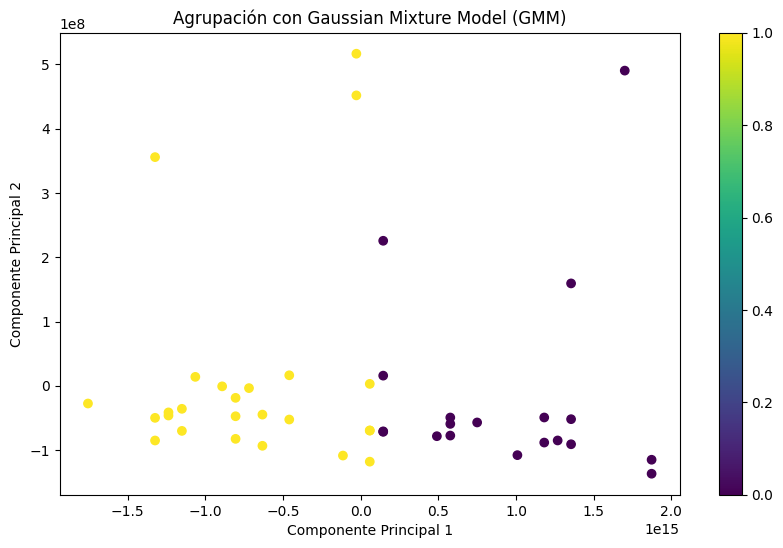

In [418]:
# Reducir la dimensionalidad a 2 componentes usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(SECOP_final)

# Crear un DataFrame con los resultados de PCA y las etiquetas de los clústeres
pca_df = pd.DataFrame(pca_result, columns=['Componente_1', 'Componente_2'])
pca_df['Cluster'] = gmm_labels

# Graficar los datos coloreados por los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Componente_1'], pca_df['Componente_2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Agrupación con Gaussian Mixture Model (GMM)')
plt.colorbar()
plt.show()
